# 🧪 Drug Classification using Logistic Regression

## By Talha Altaf
### [My Github](https://github.com/TalhaAltaf2914) | [My Linkedin](https://www.linkedin.com/in/talhaaltaf/)

#### [Kaggle Dataset](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

## ✨ Introduction
This notebook presents a machine learning project that classifies drug types based on various patient features using Logistic Regression. The dataset used contains anonymized patient records with features such as Age, Sex, Blood Pressure, Cholesterol, and Na-to-K ratio.


### 📌 Goal
To train a multi-class classifier using logistic regression, analyze the impact of regularization, and evaluate model performance using various metrics and visualizations.


### 📚 Dataset
- Source: `drug200.csv`
- Target variable: `Drug` (5 classes: 0 to 4)

### 🔧 Why Logistic Regression?
Logistic Regression is a simple yet powerful model for classification problems. It is interpretable, efficient, and performs well with regularization on structured tabular data.


## 📌 Dataset Overview
- Load dataset
- Show first few rows
- Describe dataset features

In [40]:
# Step 2: Load the file with pandas
import pandas as pd

# Replace 'drug200.csv' with the actual filename if different
df = pd.read_csv("drug200.csv")

# Step 3: Preview the dataset
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [41]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


## 📊 Data Preprocessing
- Label Encoding categorical variables (Sex, BP, Cholesterol)


In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original
df_clean = df.copy()

# Encode categorical features
label_encoders = {}
categorical_cols = ['Sex', 'BP', 'Cholesterol', 'Drug']

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

df_clean.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [43]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_clean.drop(columns=['Drug'])
y = df_clean['Drug']

print(y.value_counts())
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64
X.shape: (200, 5)
y.shape: (200,)



- Split the dataset into Train, Cross-validation (CV), and Test sets using stratified sampling

In [44]:
from sklearn.model_selection import train_test_split

# First stratified split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Second stratified split
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42, stratify=y_)


In [45]:
print("Train set class distribution:\n", pd.Series(y_train).value_counts())
print("CV set class distribution:\n", pd.Series(y_cv).value_counts())
print("Test set class distribution:\n", pd.Series(y_test).value_counts())

Train set class distribution:
 Drug
0    55
4    32
1    14
3    10
2     9
Name: count, dtype: int64
CV set class distribution:
 Drug
0    18
4    11
1     4
2     4
3     3
Name: count, dtype: int64
Test set class distribution:
 Drug
0    18
4    11
1     5
2     3
3     3
Name: count, dtype: int64


In [46]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print(f'X_cv.shape: {X_cv.shape}')
print(f'y_cv.shape: {y_cv.shape}')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (120, 5)
y_train.shape: (120,)
X_cv.shape: (40, 5)
y_cv.shape: (40,)
X_test.shape: (40, 5)
y_test.shape: (40,)




## ⚖️ Regularization Tuning
- Loop over multiple values of regularization parameter `C`
- Record training and CV scores
- Plot training and validation error vs `C`
- Highlight the `C` values where training and CV scores overlap




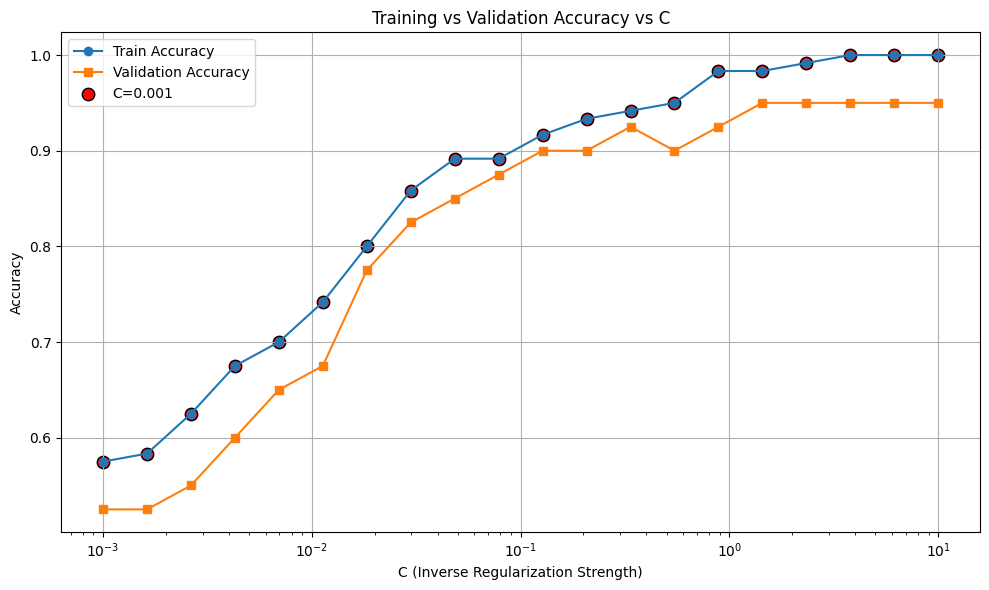


Overlapping C values (where Train ≈ Validation Accuracy):
C=0.0010 | Train Acc=0.5750 | Val Acc=0.5250
C=0.0016 | Train Acc=0.5833 | Val Acc=0.5250
C=0.0026 | Train Acc=0.6250 | Val Acc=0.5500
C=0.0043 | Train Acc=0.6750 | Val Acc=0.6000
C=0.0070 | Train Acc=0.7000 | Val Acc=0.6500
C=0.0113 | Train Acc=0.7417 | Val Acc=0.6750
C=0.0183 | Train Acc=0.8000 | Val Acc=0.7750
C=0.0298 | Train Acc=0.8583 | Val Acc=0.8250
C=0.0483 | Train Acc=0.8917 | Val Acc=0.8500
C=0.0785 | Train Acc=0.8917 | Val Acc=0.8750
C=0.1274 | Train Acc=0.9167 | Val Acc=0.9000
C=0.2069 | Train Acc=0.9333 | Val Acc=0.9000
C=0.3360 | Train Acc=0.9417 | Val Acc=0.9250
C=0.5456 | Train Acc=0.9500 | Val Acc=0.9000
C=0.8859 | Train Acc=0.9833 | Val Acc=0.9250
C=1.4384 | Train Acc=0.9833 | Val Acc=0.9500
C=2.3357 | Train Acc=0.9917 | Val Acc=0.9500
C=3.7927 | Train Acc=1.0000 | Val Acc=0.9500
C=6.1585 | Train Acc=1.0000 | Val Acc=0.9500
C=10.0000 | Train Acc=1.0000 | Val Acc=0.9500


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define C values to test
C_values = np.logspace(-3, 1, 20)

train_acc = []
val_acc = []
overlap_indices = []

# Train models and record results
for i, C in enumerate(C_values):
    model = LogisticRegression(C=C, max_iter=5000, class_weight='balanced')
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    val_score = model.score(X_cv, y_cv)

    train_acc.append(train_score)
    val_acc.append(val_score)

    # Record closeness
    # if i > 0 and (train_acc[i-1] - val_acc[i-1]) * (train_score - val_score) < 0:
    #     overlap_indices.append(i)
    if abs(train_score - val_score) <= 0.5:
        overlap_indices.append(i)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_acc, label='Train Accuracy', marker='o')
plt.plot(C_values, val_acc, label='Validation Accuracy', marker='s')

# Highlight all overlaps
for idx in overlap_indices:
    plt.scatter(C_values[idx], train_acc[idx], color='red', s=80, edgecolors='black',
                label=f'C={C_values[idx]:.3f}' if idx == overlap_indices[0] else None)

plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy vs C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print all overlapping C values
print("\nOverlapping C values (where Train ≈ Validation Accuracy):")
for idx in overlap_indices:
    print(f"C={C_values[idx]:.4f} | Train Acc={train_acc[idx]:.4f} | Val Acc={val_acc[idx]:.4f}")


### Finding the best regularization parameter

From the graph and the recorded values of the regularization parameter (**C**) and training and validation accuracies, the best value of C seems to be **1.4384**, because the **training accuracy** and the **validation accuracy** are quite close at this value of **C**, but for values of **C** > **1.4384** the **validation accuracy** flattens at around 0.9500, whereas the **training accuracy** increases to **0.9917** and flattens at **1.0** for further C values, resulting in the model overfitting.



```
C=1.4384 | Train Acc=0.9833 | Val Acc=0.9500
```

## 📈 Learning Curve & Error Curve
- Plot training, CV, and test accuracy for the best `C`


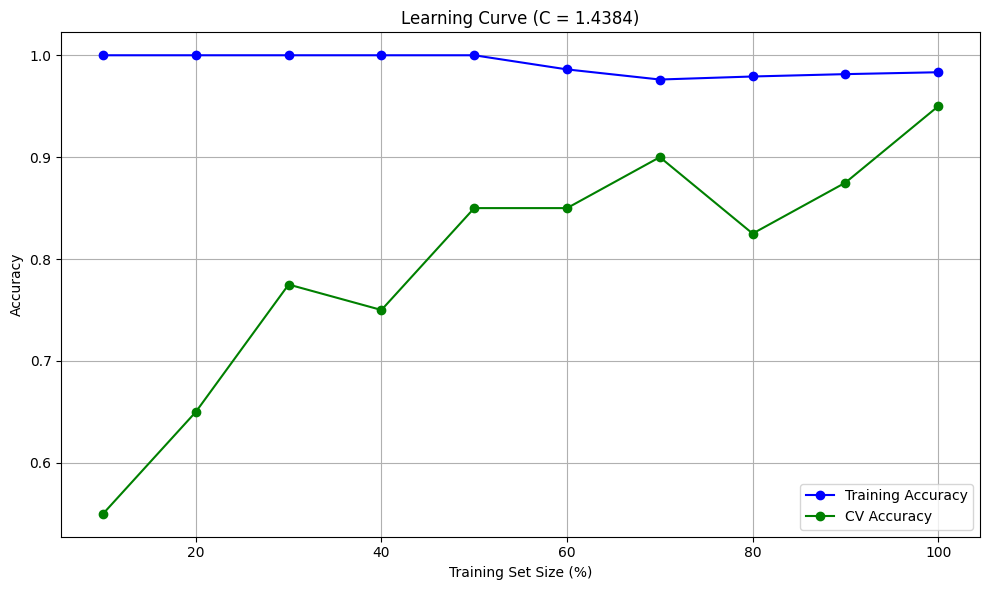

In [48]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
cv_scores = []

# Use the best model
final_model = LogisticRegression(C=1.4384, max_iter=5000, class_weight='balanced', random_state=42)

# Loop over training subset sizes
for frac in train_sizes:
    subset_size = int(frac * len(X_train))
    X_sub = X_train[:subset_size]
    y_sub = y_train[:subset_size]

    final_model.fit(X_sub, y_sub)

    y_train_pred = final_model.predict(X_sub)
    y_cv_pred = final_model.predict(X_cv)

    train_scores.append(accuracy_score(y_sub, y_train_pred))
    cv_scores.append(accuracy_score(y_cv, y_cv_pred))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, 'o-', label='Training Accuracy', color='blue')
plt.plot(train_sizes * 100, cv_scores, 'o-', label='CV Accuracy', color='green')
plt.title("Learning Curve (C = 1.4384)")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Training the best model on the entire dataset

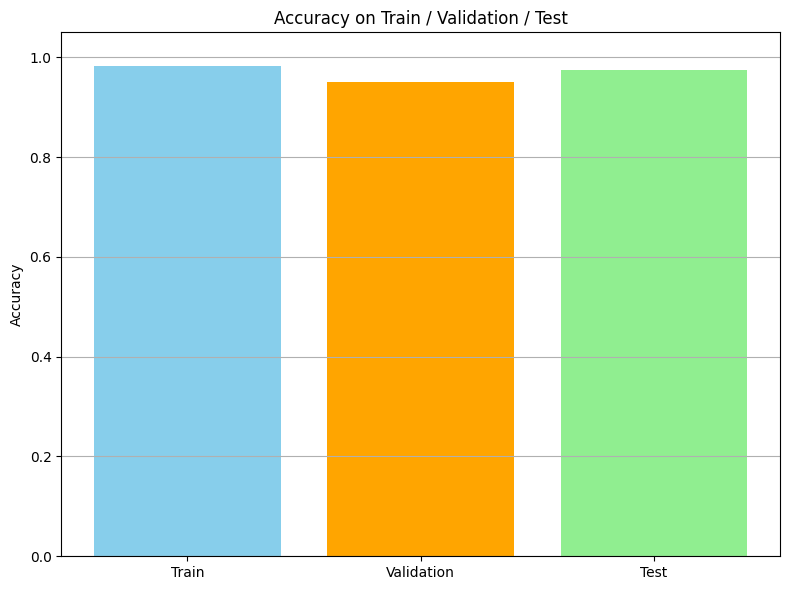

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

# C=1.4384
model = LogisticRegression(C=1.4384, max_iter=5000, class_weight='balanced')
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
val_score = model.score(X_cv, y_cv)
test_score = model.score(X_test, y_test)

plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Validation', 'Test'], [train_score, val_score, test_score], color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(0, 1.05)
plt.title('Accuracy on Train / Validation / Test')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Plot confusion matrix heatmaps for all three datasets


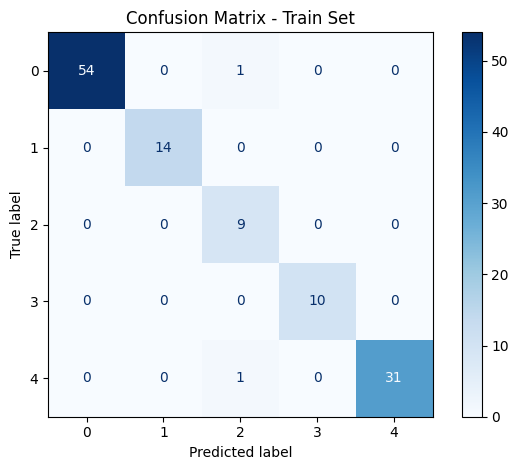

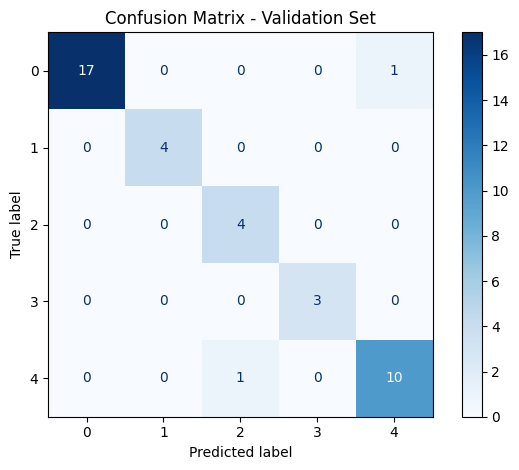

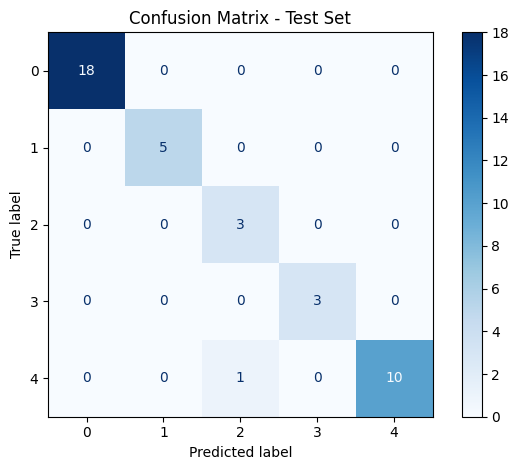

In [50]:
for name, X_set, y_set in [('Train', X_train, y_train), ('Validation', X_cv, y_cv), ('Test', X_test, y_test)]:
    ConfusionMatrixDisplay.from_estimator(model, X_set, y_set, cmap='Blues')
    plt.title(f'Confusion Matrix - {name} Set')
    plt.tight_layout()
    plt.show()

### Evaluation on Train dataset

In [51]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_train)

# print("Confusion Matrix:")
# print(confusion_matrix(y_train, y_pred))

print("\nClassification Report:")
print(classification_report(y_train, y_pred))

# decoded_predictions = label_encoders['Drug'].inverse_transform(y_pred)
# print(decoded_predictions)




Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       1.00      1.00      1.00        14
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        10
           4       1.00      0.97      0.98        32

    accuracy                           0.98       120
   macro avg       0.96      0.99      0.97       120
weighted avg       0.99      0.98      0.98       120



### Evaluation on Validation dataset

In [52]:
y_pred = model.predict(X_cv)

# print("Confusion Matrix:")
# print(confusion_matrix(y_cv, y_pred))

print("\nClassification Report:")
print(classification_report(y_cv, y_pred))

# decoded_predictions = label_encoders['Drug'].inverse_transform(y_pred)
# print(decoded_predictions)




Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         3
           4       0.91      0.91      0.91        11

    accuracy                           0.95        40
   macro avg       0.94      0.97      0.95        40
weighted avg       0.96      0.95      0.95        40




## ✅ Final Evaluation (on Test Set)
- Evaluate best model on test set
- Print classification report
- Report confusion matrix heatmap
- Final Accuracy on Test set: 97%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.95      0.98      0.96        40
weighted avg       0.98      0.97      0.98        40



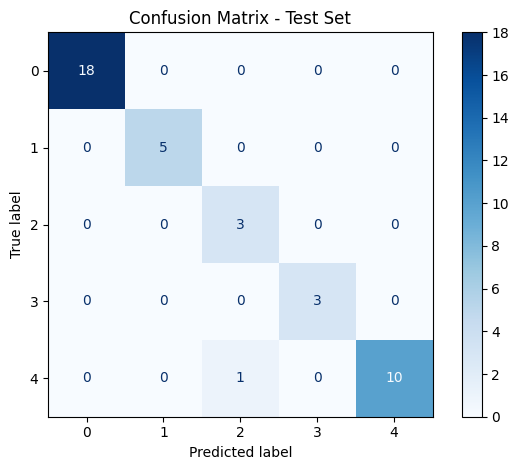

In [53]:
y_pred = model.predict(X_test)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title(f'Confusion Matrix - Test Set')
plt.tight_layout()
plt.show()

# decoded_predictions = label_encoders['Drug'].inverse_transform(y_pred)
# print(decoded_predictions)

## 📌 Observations
- The model performs well across all classes
- Class 2 was underrepresented but still predicted with reasonable accuracy
- Regularization helped reduce overfitting
- Stratified split preserved class distribution
- Accuracy on the test set was 97%, indicating strong generalization
